# Overfitting, underfitting, and generalization

In [25]:
# Code adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import matplotlib.pyplot as plt
import numpy as np

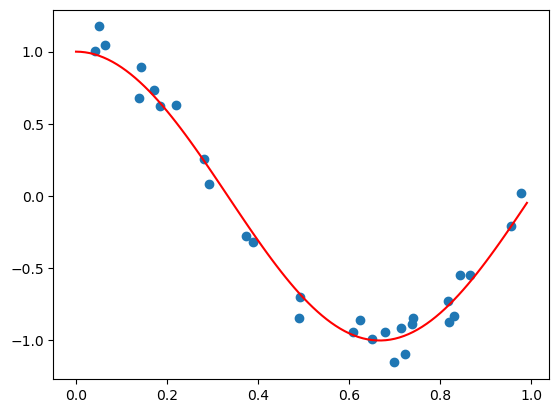

In [26]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# generate 30 different samples from the true function, adding a random noise to each one
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)
plt.plot(
    np.arange(0, 1, 0.01), np.cos(1.5 * np.pi * np.arange(0, 1, 0.01)), color="red"
)
pass;

Coefficient (or slope) =  [-2.06124255]
Intercept =  0.8272843962960308
Score = 0.66


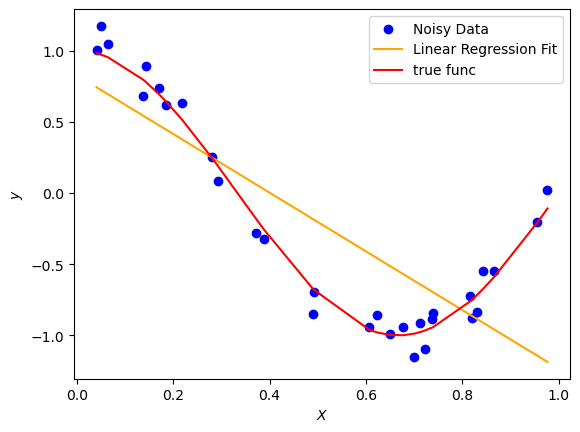

In [27]:
from sklearn.linear_model import LinearRegression

plt.scatter(X, y, label="Noisy Data", color="blue")

# Reshape X to a 2D array because LinearRegression expects that
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

X_lin = X.reshape(-1, 1)
# print(X, X_lin, X.ndim, X_lin.ndim)

# Fit a linear regression model
lr = LinearRegression().fit(X_lin, y)


print("Coefficient (or slope) = ", lr.coef_)
print("Intercept = ", lr.intercept_)
print("Score = {:.2f}".format(lr.score(X_lin, y)))

# Plot the linear regression prediction
y_pred = lr.predict(X_lin)
plt.plot(X_lin, y_pred, label="Linear Regression Fit", color="orange")

plt.plot(X, np.cos(1.5 * np.pi * X), label="true func", color="red")

# Add labels and legend
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
pass;

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

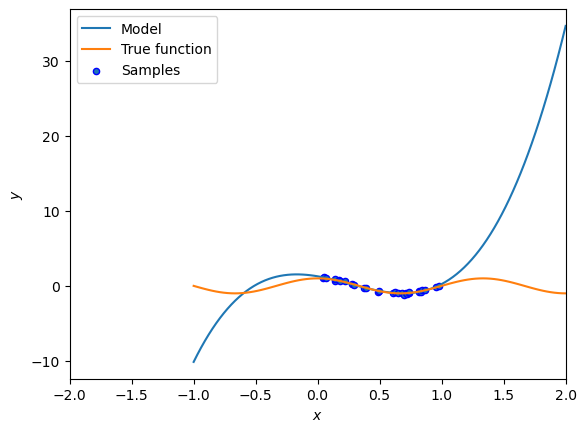

In [29]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)

# From documentation: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

linear_regression = LinearRegression()

pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(-1, 2, 100)
fig, ax = plt.subplots(1)
ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
ax.plot(X_test, true_fun(X_test), label="True function")
ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(-2, 2)
ax.legend()
pass;

## But this is not the complete story [please check this, if interested](https://alexshtf.github.io/2024/01/21/Bernstein.html)